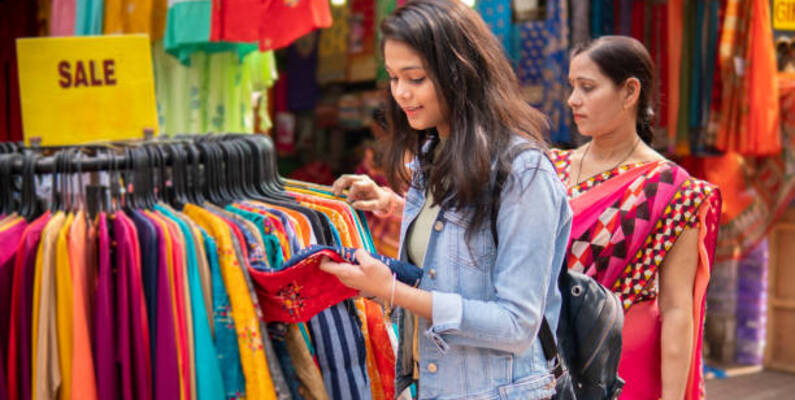

# **Project Tutorial: E-commerce Dataset with 30K Products**

## I. **Project Description**: 

**This tutorial focuses on the data cleaning of the E-commerce Dataset with dataset 30K Products**

## II. **Dataset Description**: 

**HR Analytics helps in interpreting organizational data. It finds the people related trends in the data and allows for HR Department to make appropriate steps in keeping the organization running smoothly and preiftably. Attrition in a corporation setup is one of the complex challenges that managers and HRs face in handling the organizational dataset.** [Datasource](https://www.kaggle.com/datasets/mukuldeshantri/ecommerce-fashion-dataset)

## **1. Loading the Dependencies**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
pd.set_option("display.max_columns",200)
print("All libraries successfully loaded")

All libraries successfully loaded


## **2. Loading Dataset**

In [4]:
fashiondata = pd.read_csv("FashionDataset.csv")

## 3. Feature Enginering Process: **_Understanding Dataset_**
 * **Head or First 5 rows of data**
 * **Size of dataset: shape**
 * **Data columns**
 * **Data types and the number of these categorical: Nominal and Ordinal data types:**
 * **Information about dataset**
 * **Statistical description of dataset**
 * **Checking for NaN or missing values and sort in ascending order for clarity**

### **i. Head or First 5 rows of data**

In [5]:
fashiondata.head(5)

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


### **ii. Size of dataset: shape**

In [51]:
fashiondata.shape

(30758, 8)

#### **_Observation_**: The dataset has _30758 rows_ and _8 column features_

### **iii. Data columns**

In [52]:
fashiondata.columns

Index(['Unnamed: 0', 'BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice',
       'Discount', 'Category'],
      dtype='object')

### **iv. Data types and the number of these categorical: Nominal and Ordinal data types:**

In [53]:
fashiondata.dtypes

Unnamed: 0     int64
BrandName     object
Deatils       object
Sizes         object
MRP           object
SellPrice     object
Discount      object
Category      object
dtype: object

In [54]:
nominal_col = fashiondata.select_dtypes(include = ["object"]).columns.to_list()

In [55]:
nominal_col

['BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice', 'Discount', 'Category']

In [56]:
len(nominal_col)

7

In [57]:
ordinal = fashiondata.select_dtypes(include = ["number"]).columns.to_list()

In [58]:
len(ordinal) # Ordinal data: 1 columun

1

### **v. Information about Dataset**

In [59]:
fashiondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


#### **Observation**: **We have no missing values in each col as each row has the exact number of **non-null values of 30758****

## 4. Feature Enginering Process: **_First Data Cleaning Steps_**

* **Deleting redundant columns.**
* **Renaming the columns.**
* **Dropping duplicates.**
* **Cleaning individual columns.**
* **Remove the NaN values from the dataset**
* **Check for some more Transformations**

### **i. Deleting redundant columns**.

In [60]:
fashiondata.columns

Index(['Unnamed: 0', 'BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice',
       'Discount', 'Category'],
      dtype='object')

In [61]:
fashiondata.drop(columns = ["Unnamed: 0","Discount"], inplace = True, axis = 1)

In [62]:
fashiondata.head(5) # The dataset are all now of the object data type

,BrandName,Deatils,Sizes,MRP,SellPrice,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,Westernwear-Women


### **ii. Renaming the columns**.

In [63]:
fashiondata.rename({"Deatils":"Details"}, inplace = True, axis = 1)

In [64]:
fashiondata.head(5)

,BrandName,Details,Sizes,MRP,SellPrice,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,Westernwear-Women


### **iii. Dropping Duplicates.**

In [67]:
fashiondata.duplicated(keep = "first").value_counts()

False    27931
True      2827
Name: count, dtype: int64

#### **Observation**: We have **2827 duplicates in the datasets**

<Axes: >

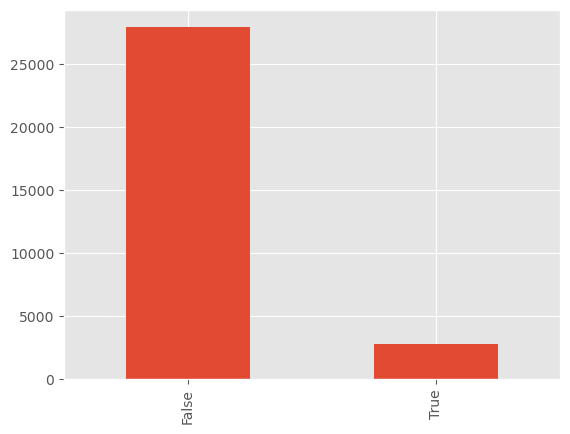

In [68]:
fashiondata.duplicated(keep = "first").value_counts().plot(kind = "bar")

#### **Dropping off Duplicates**

In [69]:
fashiondata.drop_duplicates(keep = 'first', inplace = True)

In [71]:
fashiondata.duplicated(keep ='first').sum()

0

In [72]:
fashiondata.head(10)

,BrandName,Details,Sizes,MRP,SellPrice,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,Westernwear-Women
5,kraus,wide ankle length cotton womens jeans - light ...,"Size:26,28,30,32,34",Rs\n1795,1615,Westernwear-Women
6,life,printed cotton blend collared womens regular d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1299,649,Westernwear-Women
7,fratini,embroidered wide neck polyester womens regular...,Size:XX-Large,Rs\n1299,649,Westernwear-Women
8,rare,floral polyester v neck womens flared dress - ...,"Size:Large,Medium,Small,X-Large",Rs\n2099,839,Westernwear-Women
9,rare,checks cotton boat neck womens regular top - b...,"Size:Medium,Small,X-Large",Rs\n1499,599,Westernwear-Women


### **iv. Check for some more Transformations**

In [73]:
fashiondata["BrandName"] = fashiondata["BrandName"].apply(lambda x: x.capitalize())

In [74]:
fashiondata.head(5)

,BrandName,Details,Sizes,MRP,SellPrice,Category
0,Life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,Westernwear-Women
1,Only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,Westernwear-Women
2,Fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,Westernwear-Women
3,Zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,Westernwear-Women
4,Life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,Westernwear-Women


In [75]:
fashiondata["Details"] = fashiondata["Details"].apply(lambda x: x.title())

In [77]:
fashiondata

,BrandName,Details,Sizes,MRP,SellPrice,Category
0,Life,Solid Cotton Blend Collar Neck Womens A-Line D...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,Westernwear-Women
1,Only,Polyester Peter Pan Collar Womens Blouson Dres...,"Size:34,36,38,40",Rs\n3499,2449,Westernwear-Women
2,Fratini,Solid Polyester Blend Wide Neck Womens Regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,Westernwear-Women
3,Zink london,Stripes Polyester Sweetheart Neck Womens Dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,Westernwear-Women
4,Life,Regular Fit Regular Length Denim Womens Jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,Westernwear-Women
...,...,...,...,...,...,...
30752,Shaya by caratlane,The Wing Woman Clover Charm Necklace,Nan,Nan,1250,Jewellery-Women
30753,Swarovski,Crystal Stylish Womens Rodhium Earrings,Nan,Nan,8950,Jewellery-Women
30755,Jewelz,Ethnic Gold Plated Jhumki Earrings,Nan,Rs\n1839,643,Jewellery-Women
30756,Estelle,Womens Gold Plated Double Line Fancy White And...,Nan,Nan,2799,Jewellery-Women


#### **Dealing with the Nan values**

In [79]:
fashiondata = fashiondata[fashiondata["Sizes"] != "Nan"] 

In [80]:
fashiondata 

,BrandName,Details,Sizes,MRP,SellPrice,Category
0,Life,Solid Cotton Blend Collar Neck Womens A-Line D...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,Westernwear-Women
1,Only,Polyester Peter Pan Collar Womens Blouson Dres...,"Size:34,36,38,40",Rs\n3499,2449,Westernwear-Women
2,Fratini,Solid Polyester Blend Wide Neck Womens Regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,Westernwear-Women
3,Zink london,Stripes Polyester Sweetheart Neck Womens Dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,Westernwear-Women
4,Life,Regular Fit Regular Length Denim Womens Jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,Westernwear-Women
...,...,...,...,...,...,...
26885,Swiss eagle,Womens Analogue Metallic Watch,Size:Error Size,Rs\n13990,4197,Watches-Women
27290,Lawman watches,Womens Rose Gold Dial Stainless Steel Analogue...,Size:Error Size,Rs\n7499,4999,Watches-Women
28418,Lawman watches,Womens Silver Dial Stainless Steel Analogue Wa...,Size:Error Size,Rs\n5999,3999,Watches-Women
28664,Miu miu,Eau De Parfum - 50 Ml,Size:Error Size,Nan,6100,Fragrance-Women


In [84]:
fashiondata[fashiondata["MRP"] == "Nan"].value_counts().sum()

4756

In [85]:
fashiondata = fashiondata[fashiondata["MRP"] != "Nan"]

In [86]:
fashiondata

,BrandName,Details,Sizes,MRP,SellPrice,Category
0,Life,Solid Cotton Blend Collar Neck Womens A-Line D...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,Westernwear-Women
1,Only,Polyester Peter Pan Collar Womens Blouson Dres...,"Size:34,36,38,40",Rs\n3499,2449,Westernwear-Women
2,Fratini,Solid Polyester Blend Wide Neck Womens Regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,Westernwear-Women
3,Zink london,Stripes Polyester Sweetheart Neck Womens Dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,Westernwear-Women
4,Life,Regular Fit Regular Length Denim Womens Jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,Westernwear-Women
...,...,...,...,...,...,...
26673,Lemon & pepper,Womens Casual Wear Buckle Closure Flats - Navy,"Size:36,37,38,39,40",Rs\n2999,1499,Footwear-Women
26674,Haute curry,Womens Casual Wear Slip On Heels - Black,"Size:36,37,38,39,40",Rs\n2199,1099,Footwear-Women
26885,Swiss eagle,Womens Analogue Metallic Watch,Size:Error Size,Rs\n13990,4197,Watches-Women
27290,Lawman watches,Womens Rose Gold Dial Stainless Steel Analogue...,Size:Error Size,Rs\n7499,4999,Watches-Women


In [89]:
fashiondata[fashiondata["Sizes"] == "Size:Error Size"].value_counts().sum()

3

In [90]:
fashiondata = fashiondata[fashiondata["Sizes"] != "Size:Error Size"]

In [91]:
fashiondata

,BrandName,Details,Sizes,MRP,SellPrice,Category
0,Life,Solid Cotton Blend Collar Neck Womens A-Line D...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,Westernwear-Women
1,Only,Polyester Peter Pan Collar Womens Blouson Dres...,"Size:34,36,38,40",Rs\n3499,2449,Westernwear-Women
2,Fratini,Solid Polyester Blend Wide Neck Womens Regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,Westernwear-Women
3,Zink london,Stripes Polyester Sweetheart Neck Womens Dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,Westernwear-Women
4,Life,Regular Fit Regular Length Denim Womens Jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,Westernwear-Women
...,...,...,...,...,...,...
26664,Lemon & pepper,Pu Back Strap Womens Casual Block Heel Sandals...,"Size:36,37,38,39,40",Rs\n2799,1959,Footwear-Women
26666,Lemon & pepper,Synthetic Patent Open Back Womens Party Wedge ...,"Size:36,37,38,39,40",Rs\n2799,1959,Footwear-Women
26669,Signature sole,Synthetic Slipon Womens Casual Flats - Natural,"Size:38,40",Rs\n1500,975,Footwear-Women
26673,Lemon & pepper,Womens Casual Wear Buckle Closure Flats - Navy,"Size:36,37,38,39,40",Rs\n2999,1499,Footwear-Women


### **v. Checking for final size of the dataset**

In [92]:
fashiondata.shape

(17928, 6)

In [93]:
fashiondata["Category"].value_counts()

Category
Westernwear-Women           8053
Indianwear-Women            6281
Lingerie&Nightwear-Women    2026
Footwear-Women              1568
Name: count, dtype: int64

### **vi. Exporting the cleaned data**

In [102]:
fashiondata.to_csv("Cleaned_fashiondata.csv", index = False)

In [103]:
fashiondata_cleaned = pd.read_csv("Cleaned_fashiondata.csv")

In [105]:
fashiondata_cleaned

,BrandName,Details,Sizes,MRP,SellPrice,Category
0,Life,Solid Cotton Blend Collar Neck Womens A-Line D...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,Westernwear-Women
1,Only,Polyester Peter Pan Collar Womens Blouson Dres...,"Size:34,36,38,40",Rs\n3499,2449,Westernwear-Women
2,Fratini,Solid Polyester Blend Wide Neck Womens Regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,Westernwear-Women
3,Zink london,Stripes Polyester Sweetheart Neck Womens Dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,Westernwear-Women
4,Life,Regular Fit Regular Length Denim Womens Jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,Westernwear-Women
...,...,...,...,...,...,...
17923,Lemon & pepper,Pu Back Strap Womens Casual Block Heel Sandals...,"Size:36,37,38,39,40",Rs\n2799,1959,Footwear-Women
17924,Lemon & pepper,Synthetic Patent Open Back Womens Party Wedge ...,"Size:36,37,38,39,40",Rs\n2799,1959,Footwear-Women
17925,Signature sole,Synthetic Slipon Womens Casual Flats - Natural,"Size:38,40",Rs\n1500,975,Footwear-Women
17926,Lemon & pepper,Womens Casual Wear Buckle Closure Flats - Navy,"Size:36,37,38,39,40",Rs\n2999,1499,Footwear-Women


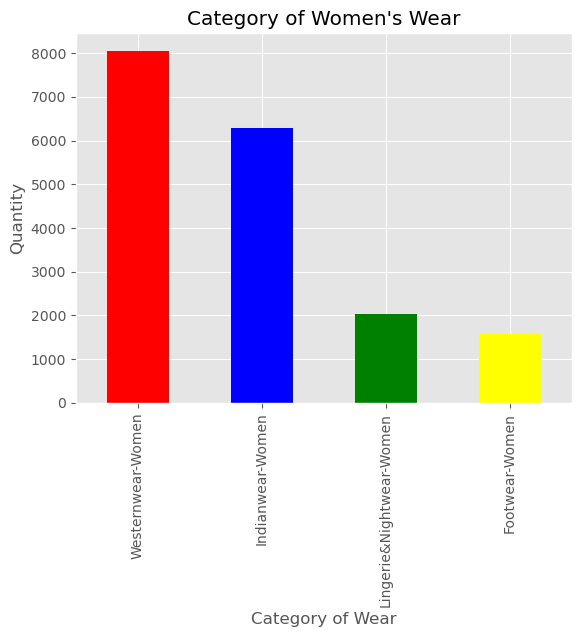

In [115]:
fashiondata["Category"].value_counts().plot(kind = "bar", color=["Red", "Blue", "Green", "Yellow"])
plt.title("Category of Women's Wear")
plt.xlabel("Category of Wear")
plt.ylabel("Quantity")
plt.show()